# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
#Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#version Maquina Linux - RedHat Fedora 33 Arbegas2
#df_train = pd.read_json(r'/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/dataset_es_train.json', lines=True)
#Version Windows
df_train = pd.read_json(r'C:\Users\alexander.valencia\Acamica Wk-03\dataset_es_train.json', lines=True)

df_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [3]:
#version Maquina Linux - RedHat Fedora 33 Arbegas2
#df_test = pd.read_json(r'/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/dataset_es_test.json', lines=True)

#Version Windows
df_test = pd.read_json(r'C:\Users\alexander.valencia\Acamica Wk-03\dataset_es_test.json', lines=True)


df_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [4]:
#version Maquina Linux - RedHat Fedora 33 Arbegas2
#df_dev = pd.read_json(r'/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/dataset_es_dev.json', lines=True)

#Version Windows
df_dev = pd.read_json(r'C:\Users\alexander.valencia\Acamica Wk-03\dataset_es_dev.json', lines=True)
df_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [5]:
#Mostrar informaciòn detallada de los DF
print("El tamaño del dataset Train es: "+str(len(df_train)))
print("El tamaño del dataset Test es:"+str(len(df_test)))
print("El tamaño del dataset Deves:"+str(len(df_dev)))

El tamaño del dataset Train es: 200000
El tamaño del dataset Test es:5000
El tamaño del dataset Deves:5000


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    40000
2    40000
3    40000
4    40000
5    40000
Name: stars, dtype: int64


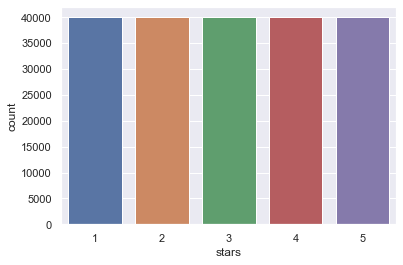

In [6]:
# La Distribución de las calificaciones por cada DATASET se muestra a continuación:
# Distribución calificaciones DataSet Entrenamiento
sns.countplot(df_train.stars)
print(df_train.stars.value_counts())

1    1000
2    1000
3    1000
4    1000
5    1000
Name: stars, dtype: int64


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


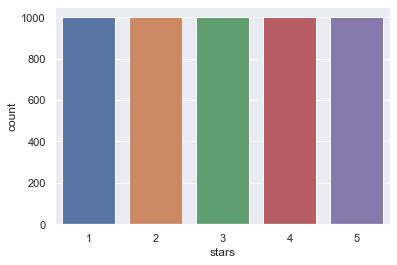

In [7]:
## Distribución calificaciones DataSet  en Test
sns.countplot(df_test.stars)
print(df_test.stars.value_counts())

1    1000
2    1000
3    1000
4    1000
5    1000
Name: stars, dtype: int64


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


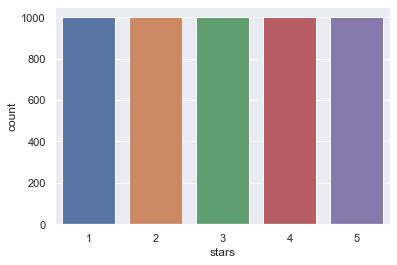

In [8]:
# Distribución calificaciones DataSet  en Dev
sns.countplot(df_dev.stars)
print(df_dev.stars.value_counts())

### Valores positivos y negativos

In [9]:
negativas = df_train[(df_train.stars == 1)|(df_train.stars == 2)]
negativas.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
60893,es_0931550,product_es_0687776,reviewer_es_0774853,2,Menos potencia que la batería Pb de 7Ah que te...,Menos potencia que la batería Pb de 7Ah que te...,es,pc
33352,es_0719704,product_es_0621811,reviewer_es_0329687,1,"Es un protector muy pequeño, no cubre la panta...",Protector insuficiente,es,wireless
16439,es_0350436,product_es_0954491,reviewer_es_0080207,1,"No recomiendo comprar, tenía prevista la entre...",Mala experiencia,es,pc
73601,es_0476060,product_es_0152435,reviewer_es_0516559,2,El teclado es silencioso. Creo que es lo único...,No me ha gustado,es,pc
36144,es_0772476,product_es_0971323,reviewer_es_0760571,1,"despues de 3 dias desde que la compré, imprime...","despues de 3 dias, imprime bandas en negro en ...",es,pc


In [10]:
positivas = df_train[(df_train.stars == 4)|(df_train.stars == 5)]
positivas.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
172702,es_0653205,product_es_0085340,reviewer_es_0953537,5,"Bascula muy precisa, la he utilizado para pesa...",La recomiendo,es,home_improvement
196845,es_0968494,product_es_0118368,reviewer_es_0984731,5,"Es precioso, color muy vivo está muy bien para...",Buen articulo,es,electronics
199944,es_0422278,product_es_0906569,reviewer_es_0465592,5,Si quieres divertirte este es tu juego!!! Lanz...,Juegazo,es,toy
159322,es_0594867,product_es_0269631,reviewer_es_0582047,4,Es un buen producto en relación calidad-precio...,Buena compra,es,kitchen
159828,es_0346897,product_es_0165111,reviewer_es_0229042,4,Muy buena protección pero queda muy perpendicu...,Esta bien relación precio pero debería inclina...,es,pc


In [11]:
negativas["review"] = negativas["review_title"] +" "+ negativas["review_body"]
negativas.head()

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_20500\1861968803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativas["review"] = negativas["review_title"] +" "+ negativas["review_body"]


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television Nevir Nada bueno se me fue ka panta...
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,Dinero tirado a la basura con esta compra Horr...
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,solo llega una unidad cuando te obligan a comp...
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,Devuelto Llega tarde y co la talla equivocada


In [13]:
#Importar NLTK (para tokenizar y procesar las StopWords
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish')) - set(['no'])

In [14]:
negativas["review"] = negativas["review"].str.lower()

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_20500\3089935652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativas["review"] = negativas["review"].str.lower()


In [15]:
#importar WordCloud 
from wordcloud import WordCloud

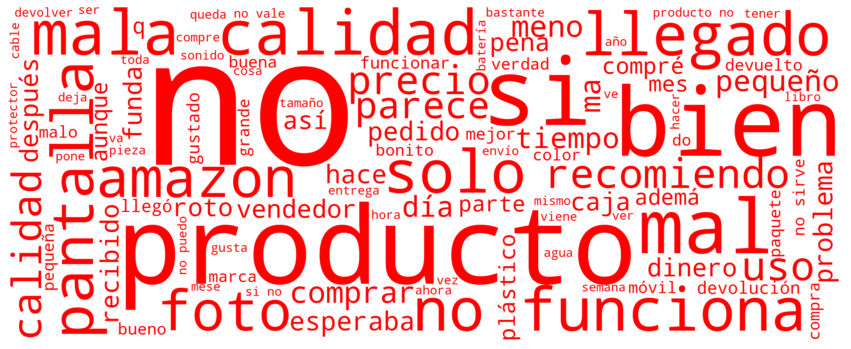

In [16]:
texto_neg = " ".join(review for review in negativas.review)

#version Linux
#Defaults to DroidSansMono path on a Linux machine. If you are on another OS or don’t have this font, you need to adjust this path.
#font = "/home/Arbegas2/anaconda3/envs/geo_env/lib/python3.10/site-packages/wordcloud/DroidSansMono.ttf"

#Version Windows
#fonth_pat = "C:\\Users\\alexander.valencia\\Acamica Wk-03\\sansserif.ttf"  
#font = fonth_pat


wordcloud = WordCloud( width = 2500, height = 1000, stopwords = stop_words,background_color = "white", 
                      color_func= lambda *args, **kwargs: "red", max_words = 100).generate(texto_neg)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  
plt.show()

In [17]:
positivas["review"] = positivas["review_title"] +" "+ positivas["review_body"]
positivas["review"] = positivas["review"].str.lower()

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_20500\1719863853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positivas["review"] = positivas["review_title"] +" "+ positivas["review_body"]
C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_20500\1719863853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positivas["review"] = positivas["review"].str.lower()


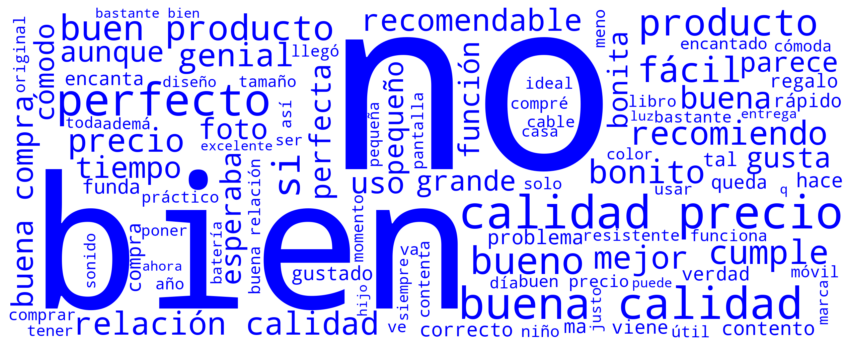

In [18]:
texto_pos = " ".join(review for review in positivas.review)  
wordcloud = WordCloud(width = 2500, height = 1000, stopwords = stop_words,background_color = "white", 
                      color_func= lambda *args, **kwargs: "blue", max_words = 100).generate(texto_pos)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  
plt.show()

## Modelo de clasificación

In [19]:
import gc #garbage collector
gc.collect()

4931

In [20]:
#Importar Spacy para procesar el dataset de palabras
#Se importa desde: python -m spacy download es_core_news_sm
import spacy
nlp = spacy.load("es_core_news_sm")

In [21]:
#Generar los nuevos datasets
df_train["review"] = df_train["review_title"] +" "+ df_train["review_body"]
df_test["review"] = df_test["review_title"] +" "+ df_test["review_body"]
df_dev["review"] = df_dev["review_title"] +" "+ df_dev["review_body"]

In [22]:
df_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television Nevir Nada bueno se me fue ka panta...
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,Dinero tirado a la basura con esta compra Horr...
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,solo llega una unidad cuando te obligan a comp...
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,Devuelto Llega tarde y co la talla equivocada


In [23]:
#Necesario limpiar los datasets y conservar los features de interés para  este análisis
train = df_train[["stars","review"]]
test = df_test[["stars","review"]]
dev = df_dev[["stars","review"]]

In [24]:
#Crear una función para normalizar cada uno de los datasets
def normalize(columna):
    normalizada = []
    for i in range(columna.shape[0]):
        review = columna[i] #seleccionar la review
        review = nlp(review)
        #tokenizar y lemmatizar con spacy, quitando signos de puntuación y números
        review = [tok.lemma_.lower() for tok in review if tok.pos_ != 'PUNCT' and tok.pos_ != 'NUM'] 
        review = [word for word in review if word not in stop_words] # Filtrar por stopwords
        review=" ".join(review) #unir nuevamente la review
        normalizada.append(review) #agregar el resultado a la lista
    return normalizada

In [25]:
#Normalizar el dataset de train
train_norm = normalize(train.review)

In [26]:
#Generar un dataset, exportarlo mientras se ejecuta la normalización
df_train_norm = pd.DataFrame({'reviews': train_norm,'stars': train.stars})
df_train_norm.head()

,reviews,stars
0,television nevir bueno ser kar pantallar menos...,1
1,dinero tirado basura compra horrible tener com...,1
2,solo llegar unidad obligar comprar obligar com...,1
3,producto no recibido no entrar descalificar ve...,1
4,devuelto llega tarde co talla equivocado,1


In [28]:
#Exportar a CSV el dataset

#opciòn para Linux
#path = "/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/df_train_norm.csv"

#opciòn para Windows
path = "C:\\Users\\alexander.valencia\\Acamica Wk-03\\df_train_norm.csv"

df_train_norm.to_csv(path)

In [30]:
#Normalizar y exportar el set de test
test_norm = normalize(test.review)
df_test_norm = pd.DataFrame({'reviews': test_norm,'stars': test.stars})

#opciòn para Linux
#path = "/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/df_test_norm.csv"

#opciòn para Windows
path = "C:\\Users\\alexander.valencia\\Acamica Wk-03\\df_test_norm.csv"


df_test_norm.to_csv(path)

In [31]:
#Normalizar y exportar el set de dev
dev_norm = normalize(dev.review)
df_dev_norm = pd.DataFrame({'reviews': dev_norm,'stars': dev.stars})
#opciòn para Linux
#path = "/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/df_dev_norm.csv"

#opciòn para Windows
path = "C:\\Users\\alexander.valencia\\Acamica Wk-03\\df_dev_norm.csv"


df_dev_norm.to_csv(path)

In [33]:
#version Linux
#df_train_norm = pd.read_csv("/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/df_train_norm.csv")

#version Windows
df_train_norm = pd.read_csv("C:\\Users\\alexander.valencia\\Acamica Wk-03\\df_train_norm.csv")


#version Linux
#df_test_norm = pd.read_csv("/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/df_test_norm.csv")

#version Windows
df_test_norm = pd.read_csv("C:\\Users\\alexander.valencia\\Acamica Wk-03\\df_test_norm.csv")

#version Linux
#df_dev_norm = pd.read_csv("/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/df_dev_norm.csv")

#Version Windows
df_dev_norm = pd.read_csv("C:\\Users\\alexander.valencia\\Acamica Wk-03\\df_dev_norm.csv")


### Vectorizar

In [34]:
#Importar el algoritmo
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# Se aplicará para las 2500 palabras con más frecuencia en todo el corpus para generar los vectores
#cada instancia tendrá 2500 features

max_features=2500
#Instanciar
cv=CountVectorizer(max_features=max_features)

In [36]:
#Entrenar y transformar el set de train
train_vec = cv.fit_transform(df_train_norm.reviews)

In [37]:
#Indagar por las palabras que fueron vectorizadas
#se revierte el vector a palabras nuevamente
all_words = cv.get_feature_names_out()

#visualizar las palabras del set, en totalidad
print("Las palabras vectorizadas fueron: ",sorted(all_words))

Las palabras vectorizadas fueron:  ['100', 'abajo', 'abierto', 'abollado', 'abr', 'abrigar', 'abril', 'abrir', 'abrí', 'absolutamente', 'absoluto', 'absorber', 'aburrido', 'acabado', 'acabar', 'acabo', 'acceder', 'acceso', 'accesorio', 'aceite', 'aceptable', 'aceptar', 'acercar', 'acero', 'acertado', 'acertar', 'acierto', 'aclarar', 'acolchado', 'aconsejable', 'aconsejar', 'aconsejo', 'acoplar', 'acoplir', 'acordado', 'acordar', 'acorde', 'acostumbrado', 'acostumbrar', 'activar', 'actividad', 'activo', 'actual', 'actualización', 'actualizar', 'acuario', 'acuerdo', 'adaptador', 'adaptar', 'adecuadamente', 'adecuado', 'adecuar', 'adelante', 'adema', 'ademas', 'además', 'adherencia', 'adhesivo', 'adhierar', 'adicional', 'adjunto', 'admitir', 'adorno', 'adquirir', 'adulto', 'afectar', 'afeitar', 'afilado', 'aflojar', 'agarrar', 'agarre', 'agarrir', 'agenda', 'agosto', 'agotar', 'agradable', 'agradecer', 'agua', 'aguantar', 'aguante', 'aguja', 'agujero', 'ahi', 'ahora', 'ahorrar', 'ahorro',

In [38]:
#Vectorizar  set de test, que corresponde al x_test
#Transformar, sin entrenar, para que tome los parámetros del set de train
test_vec = cv.transform(df_test_norm.reviews)

In [39]:
#Separar los datos en entrenamiento y test.
x_train = train_vec.toarray()
x_test = test_vec.toarray()
y_train = df_train_norm.stars
y_test = df_test_norm.stars

### A CONTINUACION GENERAR MODELOS DE MACHINE LEARNING

In [40]:
#Importar las métricas F1_score y Matrix de Confusion
from sklearn.metrics import plot_confusion_matrix,f1_score

In [41]:
#Importar el algoritmo de Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [42]:
#Instanciar y entrenar
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [43]:
#La precisión de este algoritmo sobre el DS de entrenamiento:
print("Precisión: ", nb.score(x_test,y_test))

Precisión:  0.3904


In [44]:
#Qué pasa si ejecuta la rutina para predecir
y_pred = nb.predict(x_test)

In [45]:
#Indagar por el F1-Score
print("F1-Score: ",f1_score(y_test, y_pred, average=None))

F1-Score:  [0.57406553 0.25240231 0.19972452 0.24359775 0.4926996 ]


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


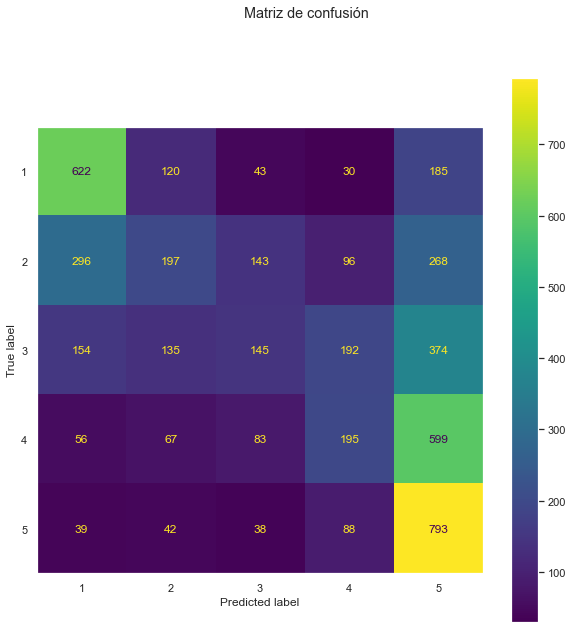

In [46]:
#Graficar matriz de confusión para Test
fig, ax = plt.subplots(figsize=(10, 10))
cm = plot_confusion_matrix(nb, x_test, y_test, ax=ax)
fig.suptitle("Matriz de confusión")
plt.grid(False)
plt.show()

In [47]:
#Importar el algoritmo
from sklearn.ensemble import RandomForestClassifier

In [48]:
#Instanciar y entrenr
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [49]:
#Resultado de la precisión de este modelo
print("Precisión: ", rf.score(x_test,y_test))

Precisión:  0.4938


In [50]:
#Consultar el F1-Score
y_pred = rf.predict(x_test) #Predecimos
#Imprimimos el score F1
print("F1-Score: ",f1_score(y_test, y_pred, average=None))

F1-Score:  [0.66424022 0.36966825 0.36051502 0.42923795 0.60473934]


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


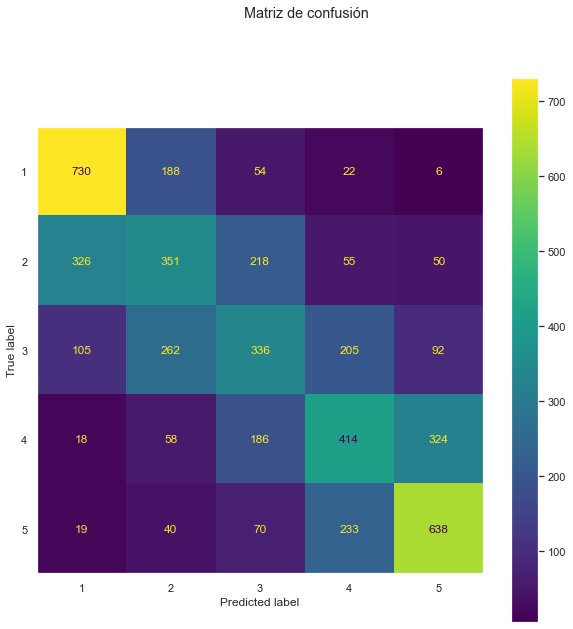

In [51]:
#Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
cm = plot_confusion_matrix(rf, x_test, y_test, ax=ax)
fig.suptitle("Matriz de confusión")
plt.grid(False)
plt.show()

C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


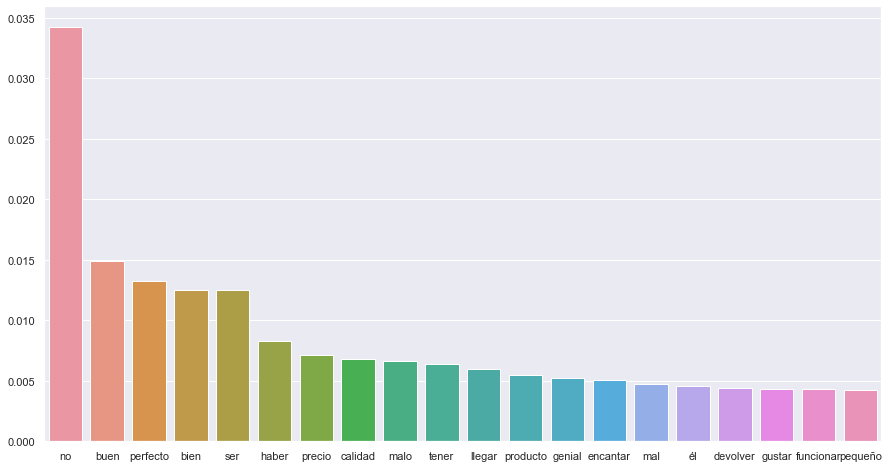

In [52]:
# Rutina para indagar por el peso de cada palabra o atributo.
importances = rf.feature_importances_
# llamar la lista de todas las palabras
columns = all_words

# Ordennar por importancia  y seleccionar las 20 primeras
indices = np.argsort(importances)[::-1] #Ordena los valores según índice en orden decreciente
indices = indices[:20] #Toma los primeros 20 valores
selected_columns = [columns[i] for i in indices] #asigna la palabra a cada valor
selected_importances = importances[indices] #Ordena los valores de "y"

# Graficar con Histograma
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

In [53]:
#Importar la librería
from sklearn.svm import LinearSVC

In [54]:
#Instanciar, entrenar y estimar precisión
svc = LinearSVC(max_iter=4000,random_state=0,dual=False)
svc.fit(x_train,y_train)

print("Precisión: ", svc.score(x_test,y_test))

Precisión:  0.5176


In [55]:
#Aplicar el  F1-Score
y_pred = svc.predict(x_test) #Predecimos
#Imprimimos el score F1
print("F1-Score: ",f1_score(y_test, y_pred, average=None))

F1-Score:  [0.66453965 0.41198108 0.37363897 0.44363636 0.63949843]


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


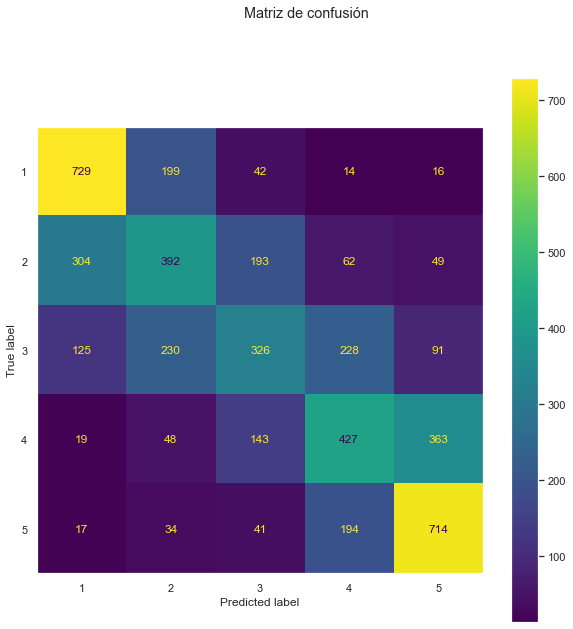

In [56]:
#Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
cm = plot_confusion_matrix(svc, x_test, y_test, ax=ax)
fig.suptitle("Matriz de confusión")
plt.grid(False)
plt.show()

In [57]:
#Importar la librería
from xgboost import XGBClassifier

C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [58]:
#Instanciar y entrenar
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)

C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [59]:
print("Precisión: ", xgb.score(x_test,y_test))

Precisión:  0.511


XGBoost se desempeña ligeramente inferior a la obtenida con el de SVC, pérdida de precisión del 1.2%

In [60]:
#Estimar el F1-Score
y_pred = xgb.predict(x_test) #Predecimos
#Imprimimos el score F1
print("F1-Score: ",f1_score(y_test, y_pred, average=None))

F1-Score:  [0.65635573 0.43237907 0.36991643 0.45941958 0.61531054]


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


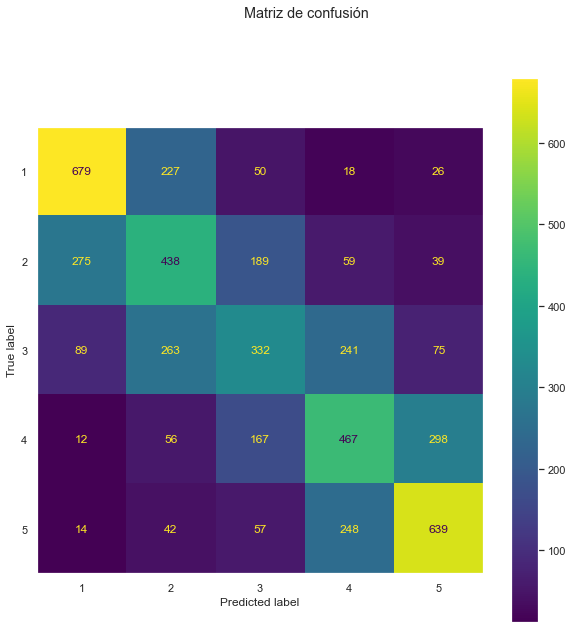

In [61]:
#Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
cm = plot_confusion_matrix(xgb, x_test, y_test, ax=ax)
fig.suptitle("Matriz de confusión")
plt.grid(False)
plt.show()

In [62]:
# Se toman las 2500 palabras con más frecuencia del corpus

max_features=2500

#Instanciar aumentando los n-gramas a 3 (3 palabras por feature)
cv_2=CountVectorizer(max_features=max_features, ngram_range=(1,3))

In [63]:
#Entrenar y transfor el set de train
train_vec_2 = cv_2.fit_transform(df_train_norm.reviews)

In [65]:
#Indagar por los n-gramas que fueron vectorizadas
# reconvertir el vector a palabras nuevamente
all_words_2 = cv_2.get_feature_names()

#Luego, el set de manera ordenada
print("las palabras ordenadas son: ",sorted(all_words_2))

las palabras ordenadas son:  ['100', 'abajo', 'abierto', 'abrir', 'abrir él', 'absolutamente', 'absoluto', 'acabado', 'acabado ser', 'acabar', 'accesorio', 'aceite', 'aceptable', 'acero', 'acierto', 'acolchado', 'aconsejable', 'aconsejar', 'aconsejo', 'acoplir', 'acorde', 'activar', 'actividad', 'adaptador', 'adaptar', 'adaptar bien', 'adaptar perfectamente', 'adecuado', 'adelante', 'adema', 'ademas', 'además', 'además no', 'además ser', 'además tener', 'adhesivo', 'adhierar', 'adquirir', 'adulto', 'agarrar', 'agarre', 'agradable', 'agradecer', 'agua', 'agua no', 'aguantar', 'aguantar bien', 'agujero', 'ahora', 'ahora haber', 'ahora no', 'ahora tener', 'ahorrar', 'ahí', 'aire', 'ajustado', 'ajustar', 'ajustar bien', 'ajustar perfectamente', 'ajuste', 'alarma', 'alcance', 'alfombra', 'algodón', 'alguien', 'algun', 'alguno', 'almohada', 'almohadilla', 'alrededor', 'altavoz', 'alto', 'altura', 'alumbrar', 'aluminio', 'amarillo', 'amazon', 'amazon no', 'ambiente', 'amigo', 'amplio', 'ancho

In [66]:
#Necesario vectorizar  los sets de test y dev
test_vec_2 = cv_2.transform(df_test_norm.reviews)
test_dev_2 = cv_2.transform(df_dev_norm.reviews)

In [67]:
#Separar los datos en entrenamiento, test y dev con nueva vectorizacion
xtrain = train_vec_2.toarray()
xtest = test_vec_2.toarray()
xdev = test_dev_2.toarray()
ytrain = df_train_norm.stars
ytest = df_test_norm.stars
ydev = df_dev_norm.stars

#### Random Forest

In [68]:
#Instanciar entrenar y estimar Precision
rf2 = RandomForestClassifier(random_state=0)
rf2.fit(xtrain,ytrain)
print("Precisión: ", rf2.score(xtest,ytest))

Precisión:  0.4962


In [69]:
#Estimar el F1-Score
ypred = rf2.predict(xtest) #Predecimos
#Imprimimos el score F1
print("F1-Score: ",f1_score(ytest, ypred, average=None))

F1-Score:  [0.65352887 0.39392352 0.38221281 0.42247659 0.59580553]


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


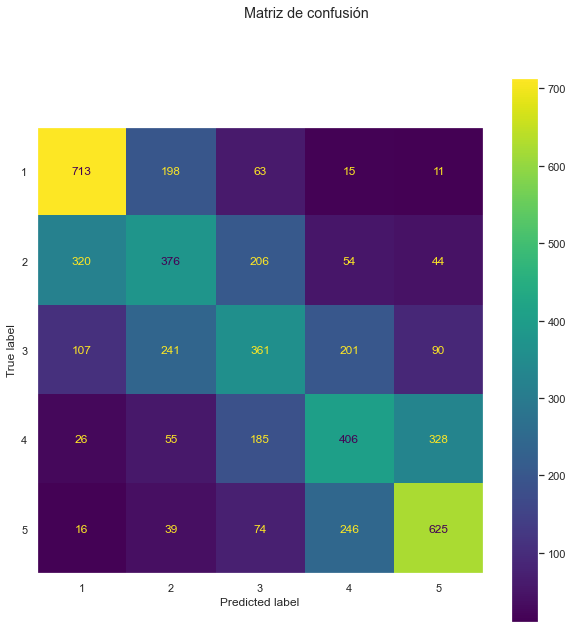

In [70]:
#Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
cm = plot_confusion_matrix(rf2, xtest, ytest, ax=ax)
fig.suptitle("Matriz de confusión")
plt.grid(False)
plt.show()

C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


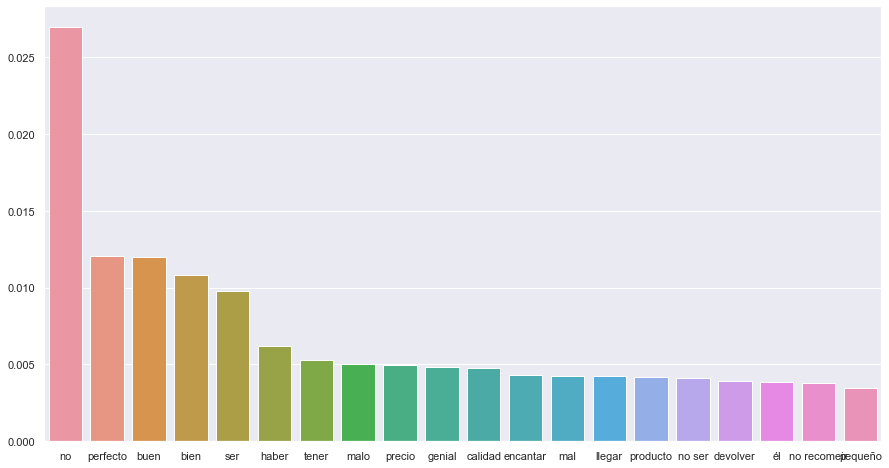

In [71]:
#Indagar por los features más imporatantes
importances = rf2.feature_importances_
# llamar la lista de palabras
columns = all_words_2

# Ordenar por importancia  y tomar las 20 primeras
indices = np.argsort(importances)[::-1] #Ordena los valores según índice en orden decreciente
indices = indices[:20] #Toma los primeros 20 valores
selected_columns = [columns[i] for i in indices] # asigna la palabra a cada valor
selected_importances = importances[indices] #Ordena los valores de "y"

# Graficar con Histograma
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

#### Linear Support Vector Classification

In [72]:
#Indagar sobre la clasificación usando SVC sobre la nueva vectorizacion
svc2 = LinearSVC(max_iter=4000,random_state=0,dual=False)
svc2.fit(xtrain,ytrain)

print("Precisión: ", svc2.score(xtest,ytest))

Precisión:  0.5298


In [73]:
#Estimar F1-Score
ypred = svc2.predict(xtest) #Predecimos
#Imprir el score F1
print("F1-Score: ",f1_score(ytest, ypred, average=None))

F1-Score:  [0.68263473 0.4314537  0.39344262 0.4447933  0.64801444]


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


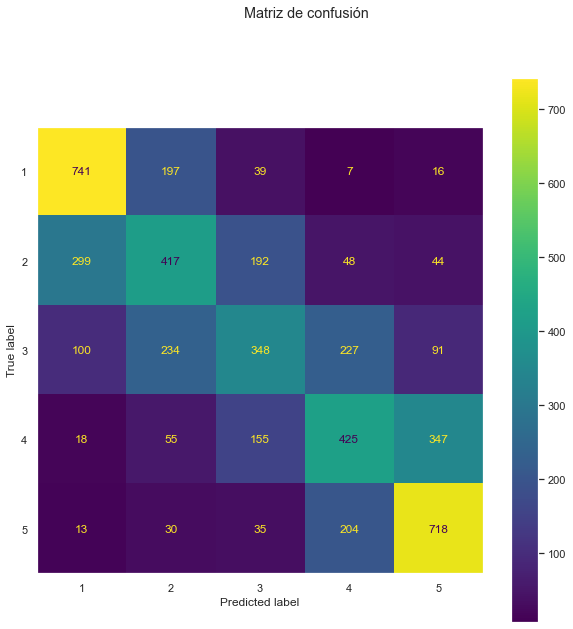

In [74]:
#Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
cm = plot_confusion_matrix(svc2, xtest, ytest, ax=ax)
fig.suptitle("Matriz de confusión")
plt.grid(False)
plt.show()

In [75]:
#Idagar sobre el desempeño del set de dev
print("Precisión: ", svc2.score(xdev,ydev))

Precisión:  0.5324


In [76]:
#Cargar nuevamente los sets
#version Linux
#df_train_norm = pd.read_csv("/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/df_train_norm.csv")

#version Windows
df_train_norm = pd.read_csv("C:\\Users\\alexander.valencia\\Acamica Wk-03\\df_train_norm.csv")

#version Linux
#df_test_norm = pd.read_csv("/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/df_test_norm.csv")

#version Windows
df_test_norm = pd.read_csv("C:\\Users\\alexander.valencia\\Acamica Wk-03\\df_test_norm.csv")

#version Linux
#df_dev_norm = pd.read_csv("/home/Arbegas2/Documents/DS4A/Acamica/DS Acamica/wk-03/df_dev_norm.csv")

#Version Windows
df_dev_norm = pd.read_csv("C:\\Users\\alexander.valencia\\Acamica Wk-03\\df_dev_norm.csv")


In [77]:
#separar los sets en "positivos" y "negativos"
train_neg = df_train_norm[(df_train_norm.stars == 1)|(df_train_norm.stars == 2)]
train_pos = df_train_norm[(df_train_norm.stars == 4)|(df_train_norm.stars == 5)]
test_neg = df_test_norm[(df_test_norm.stars == 1)|(df_test_norm.stars == 2)]
test_pos = df_test_norm[(df_test_norm.stars == 4)|(df_test_norm.stars == 5)]
dev_neg = df_dev_norm[(df_dev_norm.stars == 1)|(df_dev_norm.stars == 2)]
dev_pos = df_dev_norm[(df_dev_norm.stars == 4)|(df_dev_norm.stars == 5)]

In [78]:
#agregar una columna de "0" o de "1" a cada dataset, según sea el caso
train_neg["sentiment"] = np.zeros((len(train_neg,)),dtype=int)
test_neg["sentiment"] = np.zeros((len(test_neg,)),dtype=int)
dev_neg["sentiment"] = np.zeros((len(dev_neg,)),dtype=int)
train_pos["sentiment"] = np.ones((len(train_pos,)),dtype=int)
test_pos["sentiment"] = np.ones((len(test_pos,)),dtype=int)
dev_pos["sentiment"] = np.ones((len(dev_pos,)),dtype=int)

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_20500\3304042735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_neg["sentiment"] = np.zeros((len(train_neg,)),dtype=int)
C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_20500\3304042735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_neg["sentiment"] = np.zeros((len(test_neg,)),dtype=int)
C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_20500\3304042735.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [79]:
#unir cada dataset en un nuevo set con valores 0,1; es decir el espacio binario
train_bi = pd.concat([train_pos, train_neg])
test_bi = pd.concat([test_pos, test_neg])
dev_bi = pd.concat([dev_pos,dev_neg])

In [80]:
#Limpiar los datasets, aquellos que no tienen calificación
train_bi.drop(["Unnamed: 0", "stars"], axis = 1, inplace=True)
test_bi.drop(["Unnamed: 0", "stars"], axis = 1, inplace=True)
dev_bi.drop(["Unnamed: 0", "stars"], axis = 1, inplace=True)

In [81]:
#Resetear el index
train_bi.reset_index(inplace=True, drop=True)
test_bi.reset_index(inplace=True, drop=True)
dev_bi.reset_index(inplace=True, drop=True)

In [83]:
#Exportar los datasets como csv
path_train = "C:\\Users\\alexander.valencia\\Acamica Wk-03\\train_bi.csv"
path_test = "C:\\Users\\alexander.valencia\\Acamica Wk-03\\test_bi.csv"
path_dev = "C:\\Users\\alexander.valencia\\Acamica Wk-03\\dev_bi.csv"
train_bi.to_csv(path_train)
test_bi.to_csv(path_test)
dev_bi.to_csv(path_dev)

#Los Data sets quedan en formato binario, normalizados e imputados.

In [84]:
# Se toman 2500 palabras con más frecuencia del corpus
max_features=2500

#Instanciar
cv_bi=CountVectorizer(max_features=max_features, ngram_range=(1,3))

#Entrenar y transformar el set de train
train_vec_bi = cv_bi.fit_transform(train_bi.reviews)

In [86]:
#Vectorizar  los sets de test y dev
test_vec_bi = cv_bi.transform(test_bi.reviews)
dev_vec_bi = cv_bi.transform(dev_bi.reviews)


In [88]:
#Separar los datos en entrenamiento, test y dev.
xtrain_bi = train_vec_bi.toarray()
xtest_bi = test_vec_bi.toarray()
xdev_bi = dev_vec_bi.toarray()
ytrain_bi = train_bi.sentiment
ytest_bi = test_bi.sentiment
ydev_bi = dev_bi.sentiment

In [89]:
#Aplicar algoritmo de vectorización SVC

svc_bi = LinearSVC(C=1,random_state=1,dual=False)
svc_bi.fit(xtrain_bi,ytrain_bi)

print("Precisión: ", svc_bi.score(xtest_bi,ytest_bi))

Precisión:  0.91625


In [90]:
#Indagar el F1-Score
ypred_test = svc_bi.predict(xtest_bi) 
ypred_dev = svc_bi.predict(xdev_bi)

print("F1-Score test: ",f1_score(ytest_bi, ypred_test))
print("F1-Score dev: ",f1_score(ydev_bi, ypred_dev))

F1-Score test:  0.9161031805659905
F1-Score dev:  0.9174174174174173


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


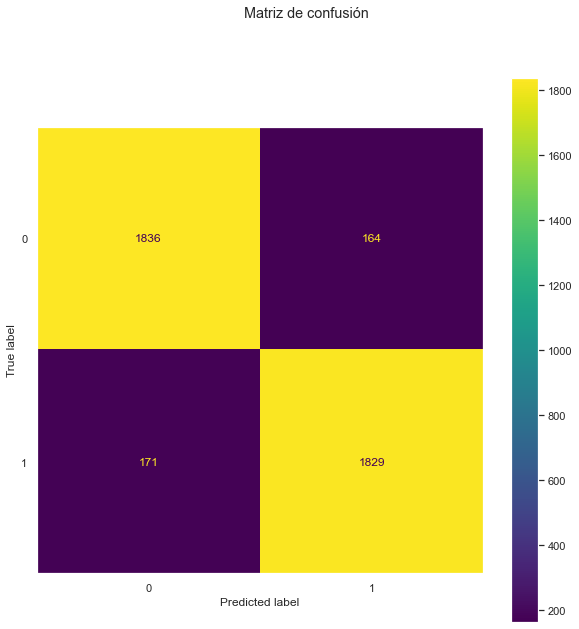

In [91]:
#Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
cm = plot_confusion_matrix(svc_bi, xtest_bi, ytest_bi, ax=ax)
fig.suptitle("Matriz de confusión")
plt.grid(False)
plt.show()

In [92]:
#Importar las librerías
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#CreaR un fold con datos mezclados
kf = KFold(shuffle=True, n_splits=10)

#Probar la puntuación o Accuracy
scores = cross_val_score(svc_bi, xtrain_bi, ytrain_bi, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.00)


In [93]:
#Se aplica el Accuracy a los sets de test y dev

scores = cross_val_score(svc_bi, xtest_bi, ytest_bi, cv=kf)
print("Accuracy test: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(svc_bi, xdev_bi, ydev_bi, cv=kf)
print("Accuracy dev: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy test: 0.86 (+/- 0.02)
Accuracy dev: 0.85 (+/- 0.03)


In [94]:
#Instanciar y entrenar con Naive Bayes sobre el DataSet Binario

nb_bi = GaussianNB()
nb_bi.fit(xtrain_bi, ytrain_bi)

#Estimar precisión de este algoritmo
print("Precisión: ", nb_bi.score(xtest_bi,ytest_bi))

Precisión:  0.85475


In [95]:
#Estimar el  F1-Score
ypred_test = nb_bi.predict(xtest_bi) 
ypred_dev = nb_bi.predict(xdev_bi)

print("F1-Score test: ",f1_score(ytest_bi, ypred_test))
print("F1-Score dev: ",f1_score(ydev_bi, ypred_dev))

F1-Score test:  0.8618311533888228
F1-Score dev:  0.859311981020166


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


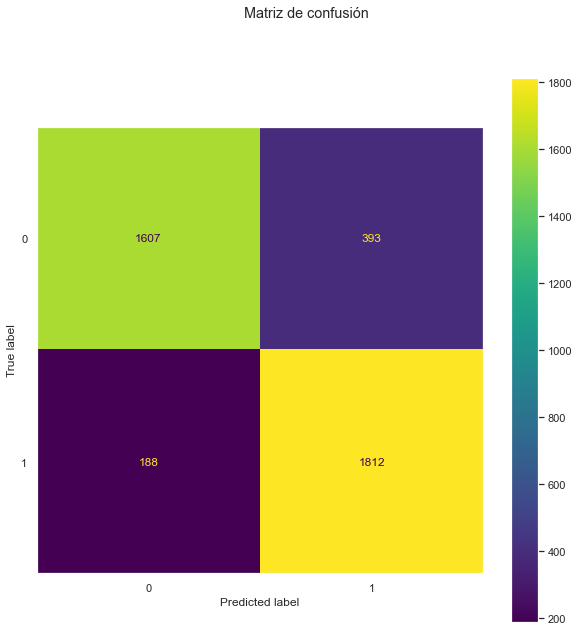

In [96]:
#Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
cm = plot_confusion_matrix(nb_bi, xtest_bi, ytest_bi, ax=ax)
fig.suptitle("Matriz de confusión")
plt.grid(False)
plt.show()

[Link a Github](https://github.com/elcarpogh/Proyecto-NLP)